In [1]:
import random
random.seed(7)
from exercise_5_12 import *

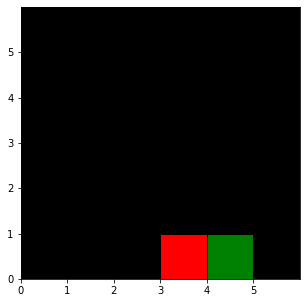

In [2]:
starting_line, finishing_line, track = get_tiny_map()
plot_map(starting_line, finishing_line, track, (6, 6), (5, 5))

In [3]:
num_episodes = 10000
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)
for ep in range(num_episodes):
    states, actions, rewards = generate_episode(starting_line, finishing_line, track, b, noise=0.0)
    policy, Q, C = learn_from_episode_off_pol(policy, b, Q, C, states, actions, rewards)

In [4]:
policy[(3, 0, 0, 0)]

{(0, 1): 1.0, (1, 0): 0.0, (1, 1): 0.0}

In [ ]:
Q[(3, 0, 0, 0), (0, 1)]

In [ ]:
C[(3, 0, 0, 0), (1, 1)]

In [ ]:
states

In [ ]:
actions

In [ ]:
rewards

In [ ]:
policy, b, Q, C = initialize_learning_off_pol(starting_line, track)
G = 0
W = 1
for t in range(len(states) - 1, -1, -1):
    print(t)
    s = states[t]
    a = actions[t]
    G = 1 * G + rewards[t]
    C[(s, a)] += W
    Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
    
    # Argmax over a, break ties by favoring the last selected action by b,
    # then by the deterministic ordering of get_greedy_action.
    # If not "favoring the last selected action by b", and simply relying on
    # the ordering of get_greedy_action, the algorithm can easily get stuck,
    # even though get_greedy_action provides consistent ordering.
    #greedy_action = get_greedy_action(Q, s)
    #if Q[(s, a)] == Q[(s, greedy_action)]:
    #    policy[s] = get_eps_greedy_probabilities(s, a)
    #else:
    #    policy[s] = get_eps_greedy_probabilities(s, greedy_action)
    policy[s] = get_eps_greedy_probabilities(s, get_greedy_action(Q, s))
    
    if list(policy[s].keys())[list(policy[s].values()).index(1)] != a:
        print("break")
        break
    W = W * (1 / b[s][a])

In [ ]:
policy[s]

In [ ]:
list(policy[s].keys())[list(policy[s].values()).index(1)]